# Import and Preprocess NBA Data

- Import advanced individual statistics from all NBA teams from 2009-2019
- Import advanced team statistics for the 2018-2019 season
------------
- Organize data into a VORP matrix

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
player_stats = pd.ExcelFile('NBA_AdvancedStats.xlsx')
print(player_stats.sheet_names)
playoff_teams = pd.ExcelFile('NBA_PlayoffTeams.xlsx')

['09_10', '10_11', '11_12', '12_13', '13_14', '14_15', '15_16', '16_17', '17_18', '18_19']


In [3]:
df_09_10 = pd.read_excel(player_stats, '09_10') # data for 2009-2010 season
year = ['09_10']*df_09_10.shape[0]
df_09_10['Year'] = year

df_10_11 = pd.read_excel(player_stats, '10_11')
year = ['10_11']*df_10_11.shape[0]
df_10_11['Year'] = year

df_11_12 = pd.read_excel(player_stats, '11_12')
year = ['11_12']*df_11_12.shape[0]
df_11_12['Year'] = year

df_12_13 = pd.read_excel(player_stats, '12_13')
year = ['12_13']*df_12_13.shape[0]
df_12_13['Year'] = year

df_13_14 = pd.read_excel(player_stats, '13_14')
year = ['13_14']*df_13_14.shape[0]
df_13_14['Year'] = year

df_14_15 = pd.read_excel(player_stats, '14_15')
year = ['14_15']*df_14_15.shape[0]
df_14_15['Year'] = year

df_15_16 = pd.read_excel(player_stats, '15_16')
year = ['15_16']*df_15_16.shape[0]
df_15_16['Year'] = year

df_16_17 = pd.read_excel(player_stats, '16_17')
year = ['16_17']*df_16_17.shape[0]
df_16_17['Year'] = year

df_17_18 = pd.read_excel(player_stats, '17_18')
year = ['17_18']*df_17_18.shape[0]
df_17_18['Year'] = year

df_18_19 = pd.read_excel(player_stats, '18_19')
year = ['18_19']*df_18_19.shape[0]
df_18_19['Year'] = year

df_playoff = pd.read_excel(playoff_teams) # table indicating if team made playoffs in year (column), 1 means made playoffs
#df_playoff.head(5)
df_18_19.head(5)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,588,6.3,0.507,0.809,...,12.2,0.1,0.6,0.6,0.053,-2.4,-0.9,-3.4,-0.2,18_19
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,123,2.9,0.379,0.833,...,9.2,-0.1,0.0,-0.1,-0.022,-5.7,-0.3,-5.9,-0.1,18_19
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,428,7.6,0.474,0.673,...,13.5,-0.1,0.2,0.1,0.011,-3.1,-1.3,-4.4,-0.3,18_19
3,4,Steven Adams\adamsst01,C,25,OKC,80,2669,18.5,0.591,0.002,...,16.4,5.1,4.0,9.1,0.163,0.6,2.1,2.7,3.2,18_19
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,1913,17.9,0.623,0.031,...,15.8,3.4,3.4,6.8,0.171,-0.6,3.6,3.0,2.4,18_19


In [4]:
# Classes for each season, 1 if team made playoffs, 0 otherwise
teams = df_playoff["Team"]
playoffs_09_10 = df_playoff["09_10"]
playoffs_10_11 = df_playoff["10_11"]
playoffs_11_12 = df_playoff["11_12"]
playoffs_12_13 = df_playoff["12_13"]
playoffs_13_14 = df_playoff["13_14"]
playoffs_14_15 = df_playoff["14_15"]
playoffs_15_16 = df_playoff["15_16"]
playoffs_16_17 = df_playoff["16_17"]
playoffs_17_18 = df_playoff["17_18"]
playoffs_18_19 = df_playoff["18_19"]

In [5]:
numTeams = 30
years = player_stats.sheet_names
numYears = len(years)

In [6]:
# Create single dataframe containing all data
data_classes = df_playoff.iloc[:,1:].values # teams represent each row arranged alphabetically, each column is years ordered chronologically
frames = [df_09_10,df_10_11,df_11_12,df_12_13,df_13_14,df_14_15,df_15_16,df_16_17,df_17_18,df_18_19]
data_players = pd.concat(frames)

In [7]:
VORP = np.zeros((10,10,numTeams))
for year in range(len(years)):
    index = (data_players.Year == years[year]) 
    df_year = data_players.loc[index,:]
    teams = sorted(df_year.Tm.unique())
    for i in range(0,30):
        index_team = (df_year.Tm == teams[i]) 
        df_team = df_year.loc[index_team,:]
        df_sorted = df_team.sort_values(by=['VORP'],ascending = False)
        VORP[year,:,i] = df_sorted.iloc[0:10,26] # each column is a data vector of interest, each column corresponds to a team (left to right)


In [8]:
classes_1d = np.reshape(data_classes.T,(-1,1))
classes_1d = np.squeeze(classes_1d)
VORP_2d = VORP[0,:,:]
for i in arange(1,len(years)):
    temp = VORP[i,:,:]
    VORP_2d = np.hstack((VORP_2d,temp))
# each column of VORP_2d is data point
VORP_2d = VORP_2d.T

In [9]:
data = VORP_2d[:,:2]
labels = classes_1d 

# Classification

- Determine the ideal number of "superstar" calibur players to determine team success
------------
- Use a variety of methods:

    - K nearest-neighbors classifier
    - Decision trees classifier
    - Random forest classifier
    - Gaussian Naive Bayes
    - Quadratic discriminant analysis
    

Output Array
[[ 1.          0.67        0.07218803  0.56666667]
 [ 2.          0.64666667  0.07916228  0.53333333]
 [ 3.          0.74666667  0.06863753  0.63333333]
 [ 4.          0.72        0.07023769  0.6       ]
 [ 5.          0.75        0.06368324  0.66666667]
 [ 6.          0.74333333  0.07895146  0.6       ]
 [ 7.          0.75333333  0.08055364  0.63333333]
 [ 8.          0.75666667  0.09433981  0.63333333]
 [ 9.          0.75333333  0.08192137  0.63333333]
 [10.          0.76666667  0.08563488  0.63333333]
 [11.          0.75666667  0.07310571  0.63333333]
 [12.          0.76333333  0.08225975  0.63333333]
 [13.          0.76666667  0.07745967  0.63333333]
 [14.          0.76333333  0.08749603  0.63333333]
 [15.          0.76        0.07717225  0.63333333]]


The KNN classifier accuracy for k = 1 is:  0.6699999999999999
The KNN classifier accuracy for k = 2 is:  0.6466666666666667
The KNN classifier accuracy for k = 3 is:  0.7466666666666667
The KNN classifier accuracy for k

Text(0, 0.5, 'Classifier Accuracy')

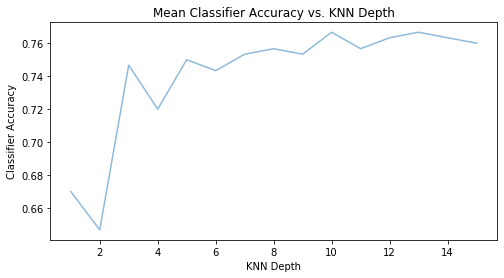

In [10]:
# Part 1: k-NN with different k values

from sklearn import neighbors 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

knn_output = np.zeros((15,4))  


# for loop that implements k-NN for k values from 1 to 15 and appends then into the knn_output array
# cross_val_score uses 10-fold cross validation to evaluate model
# output array columns made up of: k-value, mean accuracy, stdev of accuracy, and minimum accuracy

for k_value in range(1,16):  
    knn = neighbors.KNeighborsClassifier(n_neighbors = k_value) 
    knn.fit(data, labels)  
    knn_cvs = cross_val_score(knn, data, labels, cv=10)  
    knn_output[k_value-1:15] = k_value, knn_cvs.mean(), knn_cvs.std(), knn_cvs.min()
    
print('Output Array') 
print(knn_output)  


# print out mean classifier accuracy for each k-value

print('\n')
for i in range(knn_output.shape[0]): 
    print('The KNN classifier accuracy for k = {} is: '.format(i+1),knn_output[i,1])
    
    
# find and print out the maximum accuracy and its associated k-value

m = (np.max(knn_output[:,1])) 
for i in range(knn_output.shape[0]):  
    if knn_output[i,1] == m: 
        print('\nThe maximum accuracy is {} at k_value of {}'.format(m,knn_output[i,0])) 
     
    
# Plot KNN accuracy for each k value

plt.figure(figsize = (8,4))
plot(knn_output[:,0], knn_output[:,1], markeredgecolor='black', markersize=5, alpha=0.5)
plt.title('Mean Classifier Accuracy vs. KNN Depth')
plt.xlabel('KNN Depth')
plt.ylabel('Classifier Accuracy')

Output Array
[[ 1.          0.77        0.08621678  0.66666667]
 [ 2.          0.75333333  0.07774603  0.66666667]
 [ 3.          0.77        0.06741249  0.66666667]
 [ 4.          0.75333333  0.08326664  0.6       ]
 [ 5.          0.71        0.08698659  0.56666667]
 [ 6.          0.69        0.08171767  0.56666667]
 [ 7.          0.66333333  0.09122621  0.5       ]
 [ 8.          0.64666667  0.08192137  0.5       ]
 [ 9.          0.61666667  0.09689628  0.46666667]
 [10.          0.58666667  0.07774603  0.46666667]
 [11.          0.58666667  0.06531973  0.5       ]
 [12.          0.60333333  0.07520343  0.5       ]
 [13.          0.6         0.07745967  0.46666667]
 [14.          0.59333333  0.0663325   0.5       ]
 [15.          0.59666667  0.07666667  0.5       ]]


The Tree classifier accuracy for depth = 1 is:  0.7700000000000001
The Tree classifier accuracy for depth = 2 is:  0.7533333333333333
The Tree classifier accuracy for depth = 3 is:  0.77
The Tree classifier accuracy for

Text(0, 0.5, 'Classifier Accuracy')

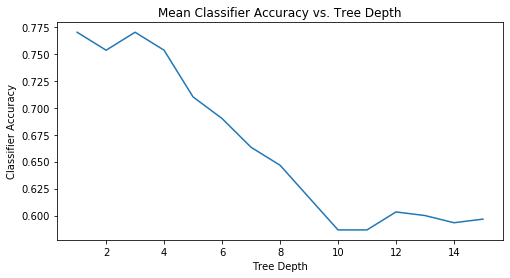

In [11]:
# Part 3: Try different decision trees


from sklearn import tree  # import tree

tree_output = np.zeros((15,4))  # create output array to hold output values


# for loop that implements tree search for depths 1-15 and appends results into the tree_output array
# cross_val_score uses 10-fold cross validation to evaluate model
# output array columns made up of: depth, mean accuracy, stdev of accuracy, and minimum accuracy

for depth in range(1,16): 
    d_tree = tree.DecisionTreeClassifier(max_depth=depth)  
    d_tree.fit(data, labels) 
    tree_cvs = cross_val_score(d_tree, data, labels, cv=10)  
    tree_output[depth-1:15] = depth, tree_cvs.mean(), tree_cvs.std(), tree_cvs.min()
    
print('Output Array')  
print(tree_output)  


# print out mean classifier accuracy for each depth

print('\n')  
for i in range(tree_output.shape[0]): 
    print('The Tree classifier accuracy for depth = {} is: '.format(i+1),tree_output[i,1])
    
    
# find and print out the maximum accuracy and its associated depth

m = (np.max(tree_output[:,1]))  
for i in range(tree_output.shape[0]): 
    if tree_output[i,1] == m: 
        print('\nThe maximum accuracy is {} at depth of {}'.format(m,tree_output[i,0])) 
        

# Plot tree accuracy for each depth

plt.figure(figsize = (8,4))
plot(tree_output[:,0], tree_output[:,1])
plt.title('Mean Classifier Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')

Output Array
[[ 1.          0.74666667  0.06699917  0.66666667]
 [ 2.          0.77333333  0.07571878  0.66666667]
 [ 3.          0.76333333  0.07063207  0.66666667]
 [ 4.          0.74666667  0.08459052  0.63333333]
 [ 5.          0.73666667  0.05044249  0.66666667]
 [ 6.          0.74333333  0.04955356  0.66666667]
 [ 7.          0.72666667  0.07272475  0.63333333]
 [ 8.          0.72        0.07483315  0.63333333]
 [ 9.          0.7         0.07302967  0.53333333]
 [10.          0.69        0.08439326  0.56666667]
 [11.          0.69666667  0.05259911  0.6       ]
 [12.          0.66666667  0.04714045  0.6       ]
 [13.          0.67        0.07371115  0.56666667]
 [14.          0.68333333  0.05821416  0.6       ]
 [15.          0.68        0.07483315  0.56666667]]


The Tree classifier accuracy for depth = 1 is:  0.7466666666666666
The Tree classifier accuracy for depth = 2 is:  0.7733333333333334
The Tree classifier accuracy for depth = 3 is:  0.7633333333333334
The Tree classifie

Text(0, 0.5, 'Classifier Accuracy')

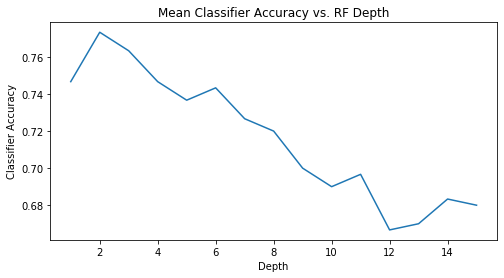

In [12]:
from sklearn.ensemble import RandomForestClassifier

RF_output = np.zeros((15,4))


# for loop that implements RandomForestClassifier for depths 1-15 and appends results into the knn_output array
# cross_val_score uses 10-fold cross validation to evaluate model
# output array columns made up of: depth, mean accuracy, stdev of accuracy, and minimum accuracy

for i in range(1,16):  
    RF = RandomForestClassifier(n_estimators=10,max_depth=i)  
    RF.fit(data, labels) 
    RF_cvs = cross_val_score(RF, data, labels, cv=10) 
    RF_output[i-1:15] = i, RF_cvs.mean(), RF_cvs.std(), RF_cvs.min()
    
print('Output Array') 
print(RF_output)


# print out mean classifier accuracy for each depth

print('\n')  
for i in range(RF_output.shape[0]):  
    print('The Tree classifier accuracy for depth = {} is: '.format(i+1),RF_output[i,1])  
    
    
# find and print out the maximum accuracy and its associated depth

m = (np.max(RF_output[:,1]))  
for i in range(RF_output.shape[0]):  
    if RF_output[i,1] == m:  
        print('\nThe maximum accuracy is {} at depth of {}'.format(m,RF_output[i,0])) 
        

# Plot Random Forrest accuracy for each depth

plt.figure(figsize = (8,4))
plot(RF_output[:,0], RF_output[:,1])
plt.title('Mean Classifier Accuracy vs. RF Depth')
plt.xlabel('Depth')
plt.ylabel('Classifier Accuracy')

Output Array
[[1.         0.75666667 0.08825468 0.6       ]
 [2.         0.68       0.04760952 0.6       ]
 [3.         0.66333333 0.08359957 0.5       ]
 [4.         0.71666667 0.08595865 0.56666667]
 [5.         0.75666667 0.08439326 0.6       ]]


The GNB classifier accuracy for prior 1 is:  0.7566666666666666
The GNB classifier accuracy for prior 2 is:  0.6799999999999999
The GNB classifier accuracy for prior 3 is:  0.6633333333333333
The GNB classifier accuracy for prior 4 is:  0.7166666666666666
The GNB classifier accuracy for prior 5 is:  0.7566666666666666

The maximum accuracy is 0.7566666666666666 at prior of 1.0

The maximum accuracy is 0.7566666666666666 at prior of 5.0


Text(0.5, 0, 'Prior')

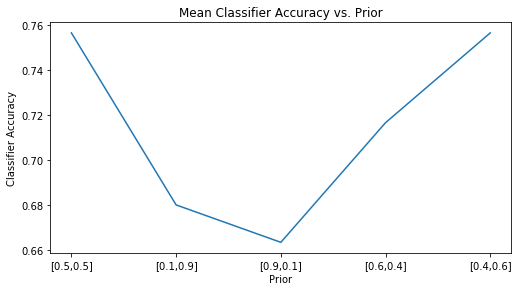

In [13]:
# Part 2: Gaussian Naive Bayes with different priors


from sklearn.naive_bayes import GaussianNB  

gnb_output = np.zeros((5,4))  


# create a variety of priors to use with GaussianNB test
# these priors must have 2 elements (equal to number of classes) and must add up to 1
# first prior is uniform, other 4 priors were selected to create well balanced distribution

prior1 = [0.5,0.5]
prior2 = [0.1,0.9]
prior3 = [0.9,0.1]
prior4 = [0.6,0.4]
prior5 = [0.4,0.6]

priors = [prior1, prior2, prior3, prior4, prior5]


# for loop that implements GaussianNB for priors 1-5 and appends results into the gnb_output array
# cross_val_score uses 10-fold cross validation to evaluate model
# output array columns made up of: prior number, mean accuracy, stdev of accuracy, and minimum accuracy

for i in range(len(priors)): 
    gnb = GaussianNB(priors = priors[i])  
    gnb.fit(data, labels) 
    gnb_cvs = cross_val_score(gnb, data, labels, cv=10)
    gnb_output[i] = i+1, gnb_cvs.mean(), gnb_cvs.std(), gnb_cvs.min()
    
print('Output Array') 
print(gnb_output)  


# print out mean classifier accuracy for each prior

print('\n')  
for i in range(gnb_output.shape[0]):  
    print('The GNB classifier accuracy for prior {} is: '.format(i+1),gnb_output[i,1])
    
    
# find and print out the maximum accuracy and its associated prior

m = (np.max(gnb_output[:,1]))  
for i in range(gnb_output.shape[0]): 
    if gnb_output[i,1] == m: 
        print('\nThe maximum accuracy is {} at prior of {}'.format(m,gnb_output[i,0]))  
        
        
# Plot GaussianNB accuracy for each prior

priorsStr = ['[0.5,0.5]', '[0.1,0.9]', '[0.9,0.1]', '[0.6,0.4]', '[0.4,0.6]']

fig = plt.figure(figsize = (8,4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(gnb_output[:,0], gnb_output[:,1])
ax.set_yticks(np.arange(0.66,0.78,0.02))
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(priorsStr)
ax.set_title('Mean Classifier Accuracy vs. Prior')
ax.set_ylabel('Classifier Accuracy')
ax.set_xlabel('Prior')

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

QDA_output = np.zeros((1,4))


# for loop that implements RandomForestClassifier for depths 1-15 and appends results into the knn_output array
# cross_val_score uses 10-fold cross validation to evaluate model
# output array columns made up of: depth, mean accuracy, stdev of accuracy, and minimum accuracy

qda = QDA()
qda.fit(data, labels)
qda_cvs = cross_val_score(qda, data, labels, cv=10)  
QDA_output[:] = 1, qda_cvs.mean(), qda_cvs.std(), qda_cvs.min() 

print('Output Array')  
print(QDA_output) 


# print out mean classifier accuracy for each depth

print('\n')  
for i in range(QDA_output.shape[0]):  
    print('The Tree classifier accuracy for depth = {} is: '.format(i+1),QDA_output[i,1])  
    
    
# find and print out the maximum accuracy and its associated depth

m = (np.max(QDA_output[:,1]))  
for i in range(QDA_output.shape[0]):  
    if QDA_output[i,1] == m: 
        print('\nThe maximum accuracy is {} at depth of {}'.format(m,QDA_output[i,0])) 

Output Array
[[1.         0.74       0.08919392 0.6       ]]


The Tree classifier accuracy for depth = 1 is:  0.74

The maximum accuracy is 0.74 at depth of 1.0


In [15]:
# Classification based on number of players used

NN_scores = np.zeros(10)
Tree_scores = np.zeros(10)
RF_scores = np.zeros(10)
GNB_scores = np.zeros(10)
QDA_scores = np.zeros(10)

for n in range(10):
    data = VORP_2d[:,:n+1]
    labels = classes_1d
    
    NN_temp = []
    for k_value in range(1,16):  
        knn = neighbors.KNeighborsClassifier(n_neighbors = k_value) 
        knn.fit(data, labels)  
        knn_cvs = cross_val_score(knn, data, labels, cv=10)  
        NN_temp.append(knn_cvs.mean())
    NN_scores[n] = max(NN_temp)
    
    
    tree_temp = []
    for depth in range(1,16): 
        d_tree = tree.DecisionTreeClassifier(max_depth=depth)  
        d_tree.fit(data, labels) 
        tree_cvs = cross_val_score(d_tree, data, labels, cv=10)  
        tree_temp.append(tree_cvs.mean())
    Tree_scores[n] = max(tree_temp)

    
    RF_temp = []
    for i in range(1,16):  
        RF = RandomForestClassifier(n_estimators=10,max_depth=i)  
        RF.fit(data, labels) 
        RF_cvs = cross_val_score(RF, data, labels, cv=10) 
        RF_temp.append(RF_cvs.mean())
    RF_scores[n] = max(RF_temp)
    
    
    prior1 = [0.5,0.5]
    prior2 = [0.1,0.9]
    prior3 = [0.9,0.1]
    prior4 = [0.6,0.4]
    prior5 = [0.4,0.6]

    priors = [prior1, prior2, prior3, prior4, prior5]
    
    GNB_temp = []
    for i in range(len(priors)): 
        gnb = GaussianNB(priors = priors[i])  
        gnb.fit(data, labels) 
        gnb_cvs = cross_val_score(gnb, data, labels, cv=10)
        GNB_temp.append(gnb_cvs.mean())
    GNB_scores[n] = max(GNB_temp)
    
    
    qda = QDA()
    qda.fit(data, labels)
    qda_cvs = cross_val_score(qda, data, labels, cv=10)  
    QDA_scores[n] = qda_cvs.mean()

Text(0.5, 0, 'Number of Players Included')

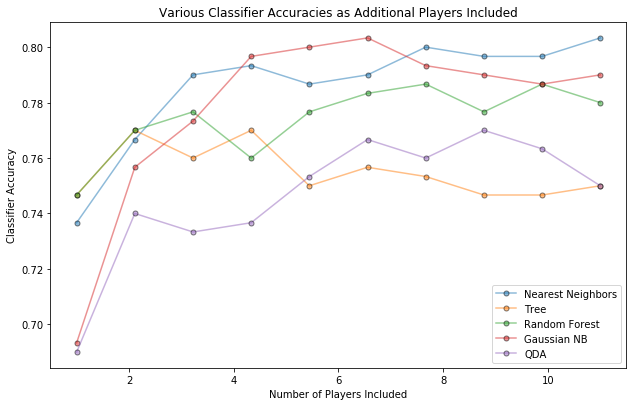

In [16]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xax = np.linspace(1,11,10)
ax.plot(xax, NN_scores, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)
ax.plot(xax, Tree_scores, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)
ax.plot(xax, RF_scores, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)
ax.plot(xax, GNB_scores, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)
ax.plot(xax, QDA_scores, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)

ax.legend(['Nearest Neighbors','Tree','Random Forest','Gaussian NB','QDA'],loc='lower right')

ax.set_title('Various Classifier Accuracies as Additional Players Included')
ax.set_ylabel('Classifier Accuracy')
ax.set_xlabel('Number of Players Included')

In [17]:
NN_scores_removed = np.zeros(10)
Tree_scores_removed = np.zeros(10)
RF_scores_removed = np.zeros(10)
GNB_scores_removed = np.zeros(10)
QDA_scores_removed = np.zeros(10)

for n in range(10):
    data = VORP_2d[:,n:]
    labels = classes_1d
    
    NN_temp = []
    for k_value in range(1,16):  
        knn = neighbors.KNeighborsClassifier(n_neighbors = k_value) 
        knn.fit(data, labels)  
        knn_cvs = cross_val_score(knn, data, labels, cv=10)  
        NN_temp.append(knn_cvs.mean())
    NN_scores_removed[n] = max(NN_temp)
    
    
    tree_temp = []
    for depth in range(1,16): 
        d_tree = tree.DecisionTreeClassifier(max_depth=depth)  
        d_tree.fit(data, labels) 
        tree_cvs = cross_val_score(d_tree, data, labels, cv=10)  
        tree_temp.append(tree_cvs.mean())
    Tree_scores_removed[n] = max(tree_temp)

    
    RF_temp = []
    for i in range(1,16):  
        RF = RandomForestClassifier(n_estimators=10,max_depth=i)  
        RF.fit(data, labels) 
        RF_cvs = cross_val_score(RF, data, labels, cv=10) 
        RF_temp.append(RF_cvs.mean())
    RF_scores_removed[n] = max(RF_temp)
    
    
    prior1 = [0.5,0.5]
    prior2 = [0.1,0.9]
    prior3 = [0.9,0.1]
    prior4 = [0.6,0.4]
    prior5 = [0.4,0.6]

    priors = [prior1, prior2, prior3, prior4, prior5]
    
    GNB_temp = []
    for i in range(len(priors)): 
        gnb = GaussianNB(priors = priors[i])  
        gnb.fit(data, labels) 
        gnb_cvs = cross_val_score(gnb, data, labels, cv=10)
        GNB_temp.append(gnb_cvs.mean())
    GNB_scores_removed[n] = max(GNB_temp)
    
    
    qda = QDA()
    qda.fit(data, labels)
    qda_cvs = cross_val_score(qda, data, labels, cv=10)  
    QDA_scores_removed[n] = qda_cvs.mean()

Text(0.5, 0, 'Number of Players Removed')

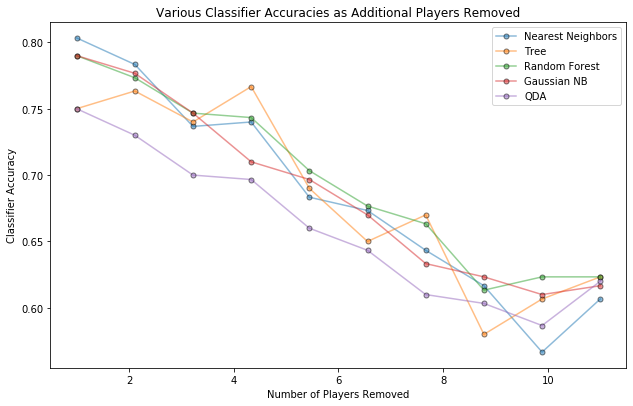

In [18]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

xax = np.linspace(1,11,10)
ax.plot(xax, NN_scores_removed, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)
ax.plot(xax, Tree_scores_removed, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)
ax.plot(xax, RF_scores_removed, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)
ax.plot(xax, GNB_scores_removed, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)
ax.plot(xax, QDA_scores_removed, marker='o', markeredgecolor='black', markersize=5, alpha=0.5)

ax.legend(['Nearest Neighbors','Tree','Random Forest','Gaussian NB','QDA'],loc='upper right')

ax.set_title('Various Classifier Accuracies as Additional Players Removed')
ax.set_ylabel('Classifier Accuracy')
ax.set_xlabel('Number of Players Removed')